## RF (Classification and Regression) Models

While implementing the decision tree we will go through the following two phases:

1- Building Phase
   * Preprocess the dataset 
   * Split the dataset from train and test using Python sklearn package.
   * Train the classifier.
   
2- Operational Phase
   * Make predictions.
   * Calculate the accuracy.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

# 1- RF Regression: 

In [79]:
df = pd.read_csv('pollution_us_2000_2016.csv')

# Removing the 'unnamed' col 
df = df.iloc[:, 1:]

In [80]:
df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [81]:
df.shape

(1746661, 28)

- Preprocess the dataset

In [82]:
df.isna().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [83]:
# dropping the unnecessary columns 

unnColumns = ['SO2 AQI', 'State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units']
df.drop(columns= unnColumns , inplace = True)

# Delete rows with NAs
df = df.dropna(axis='rows')  

In [84]:
df.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000,873338.000000
mean,12.822721,25.416851,11.731223,23.900144,0.026124,0.039203,10.170469,36.050149,1.870685,4.493011,9.664998,0.369740,0.529251,6.255429,5.996595
std,9.504904,16.000017,7.877525,15.163193,0.011369,0.015344,4.002893,19.780627,2.760914,7.680965,6.731092,0.316373,0.509984,7.842127,5.851836
min,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000
25%,5.750000,13.000000,5.000000,12.000000,0.017875,0.029000,9.000000,25.000000,0.256522,0.800000,5.000000,0.191667,0.200000,0.000000,2.000000
50%,10.739130,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,0.987500,2.000000,8.000000,0.295833,0.400000,2.000000,5.000000
75%,17.714286,35.700000,20.000000,33.000000,0.033909,0.048000,11.000000,42.000000,2.325000,5.000000,14.000000,0.470833,0.700000,10.000000,8.000000
max,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.625000,351.000000,23.000000,7.508333,15.500000,23.000000,201.000000



     the sum of nulls is centred in the 'CO AQI' after using df.describe() 
     we notice that difference between the avg & max is huge and would not
     make sense to replace null values with avg value, instead we can drop and
     train the model on the existed data   


In [90]:
df_cleaned.shape

(873338, 19)

In [91]:
df_cleaned.dtypes

State                 object
County                object
City                  object
Date Local            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [92]:
df_cleaned.isna().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [93]:
# looking into corr between col to decide on which cols to use in featureset

corr = df_cleaned.corr()
corr.style.background_gradient(cmap='coolwarm')

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
NO2 Mean,1.000000,0.904378,0.112575,0.905413,-0.432672,-0.151993,0.027256,-0.082357,0.348169,0.281935,0.117444,0.637992,0.656520,0.245892,0.661031
NO2 1st Max Value,0.904378,1.000000,0.147982,0.997860,-0.291844,0.009868,0.022393,0.048737,0.301589,0.261994,0.131081,0.558780,0.605721,0.288338,0.611550
NO2 1st Max Hour,0.112575,0.147982,1.000000,0.147199,-0.203153,-0.090471,-0.125680,-0.086772,0.027121,0.021731,0.173742,0.038061,0.056494,0.301186,0.057663
NO2 AQI,0.905413,0.997860,0.147199,1.000000,-0.291732,0.010322,0.022338,0.049020,0.305190,0.265050,0.129945,0.561682,0.608611,0.288653,0.614445
O3 Mean,-0.432672,-0.291844,-0.203153,-0.291732,1.000000,0.860610,0.045780,0.768757,-0.110416,-0.072470,-0.083138,-0.331211,-0.353442,-0.217403,-0.355314
O3 1st Max Value,-0.151993,0.009868,-0.090471,0.010322,0.860610,1.000000,0.055552,0.931868,-0.016091,0.025365,-0.015703,-0.178688,-0.180505,-0.101891,-0.179301
O3 1st Max Hour,0.027256,0.022393,-0.125680,0.022338,0.045780,0.055552,1.000000,0.048425,0.026537,0.027544,-0.025061,0.017285,0.006702,-0.086661,0.008648
O3 AQI,-0.082357,0.048737,-0.086772,0.049020,0.768757,0.931868,0.048425,1.000000,0.015538,0.044317,0.000925,-0.126474,-0.131425,-0.078973,-0.130092
SO2 Mean,0.348169,0.301589,0.027121,0.305190,-0.110416,-0.016091,0.026537,0.015538,1.000000,0.828451,0.129427,0.214334,0.200783,0.085377,0.204040
SO2 1st Max Value,0.281935,0.261994,0.021731,0.265050,-0.072470,0.025365,0.027544,0.044317,0.828451,1.000000,0.136996,0.148882,0.146596,0.068239,0.149964


-  Selecting the feature & target set 
-  Split the dataset from train and test using Python sklearn package.

In [94]:
'''
  --> The variable X contains the attributes (highly correlated with target --> 0.6), 
       NOTE: I avoied using 0.9 bc it could be data leakage. 
  
  --> While the variable Y contains the target variable of the dataset.

'''
vars = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 AQI' ]
target = 'CO AQI'

X = df[vars]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [95]:
print(X_train.shape)
print(X_test.shape)

(655003, 3)
(218335, 3)


## Random Forest For Regression


-  Building method for RF Regression 

In [96]:
# Function to perform training with RandomForestRegressor
def tarin_using_RFR(X_train, y_train):
  
    reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
    reg_forest.fit(X_train, y_train)
    print(reg_forest.feature_importances_)

    return reg_forest

In [116]:
# Function to perform training with RandomForestRegressor 
def tarin_using_RFR_Grid(X_train, y_train):
  
    reg_forest = RandomForestRegressor(n_estimators = 5, max_depth = 6,random_state = 0, criterion = 'mse')
    reg_forest.fit(X_train, y_train)
    print(reg_forest.feature_importances_)

    return reg_forest

-  Building method for prediction 

In [104]:
def prediction(X_test, clf_object):
  
    # Predicton on test with RFR
    preds_forest = clf_object.predict(X_test)
    print("Predicted values:")
    print(preds_forest)
    return preds_forest

-  Building method for Cost Function  

In [105]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("MSE: ",
        mean_absolute_error(y_true=y_test, y_pred=y_pred))

- Training the Model

In [99]:
clf_RFR = tarin_using_RFR(X_train, y_train)

[0.8214676  0.12052582 0.05800658]


We can see that the first col = 'NO2 Mean' is the most impotrant feature for the target

- Training results 

In [106]:
# Prediction using RFR

print("Results Using RF Regression:")

y_pred_RF = prediction(X_test, clf_RFR)
cal_accuracy(y_test, y_pred_RF)

Results Using RF Regression:
Predicted values:
[2.71421415 9.11714679 4.75333333 ... 4.23919529 6.28332973 2.9       ]
MSE:  2.303363980972794


# Optional Task:
- Create a Random Forest using Grid Seach to optimize your hyperparameters

In [109]:
# Regression
# repeat this

param_grid2 = {
    "n_estimators": [5,6,10], # how many trees in our forest  1
    "max_depth": [2,4,6] # how deep each decision tree can be
    
    
}
grid2 = GridSearchCV(
    clf_RFR,
    param_grid2,
    cv = 5,
    n_jobs= -1,
    verbose= 1,
    scoring="neg_mean_absolute_error"
)

grid2.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'n_estimators': [5, 6, 10]},
             scoring='neg_mean_absolute_error', verbose=1)

In [110]:
grid2.best_params_

{'max_depth': 6, 'n_estimators': 10}

In [111]:
grid2.best_estimator_.estimators_

[DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1478610112),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1537364731),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1491434855),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1819583497),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=530702035)]

In [112]:
grid_df = pd.DataFrame(grid2.cv_results_)

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.296173,0.075829,0.028983,0.001962,2,5,"{'max_depth': 2, 'n_estimators': 5}",-2.841329,-2.830343,-2.868153,-2.853230,-2.863893,-2.851390,0.014035,9
1,1.717669,0.037965,0.031761,0.000940,2,6,"{'max_depth': 2, 'n_estimators': 6}",-2.840248,-2.831441,-2.867080,-2.851664,-2.865908,-2.851268,0.013993,8
2,2.751906,0.036236,0.049133,0.003020,2,10,"{'max_depth': 2, 'n_estimators': 10}",-2.837581,-2.830226,-2.863731,-2.849066,-2.863330,-2.848787,0.013454,7
3,2.572461,0.029672,0.045648,0.007202,4,5,"{'max_depth': 4, 'n_estimators': 5}",-2.705393,-2.695896,-2.713975,-2.708978,-2.718309,-2.708510,0.007680,6
4,3.084822,0.015524,0.048233,0.002314,4,6,"{'max_depth': 4, 'n_estimators': 6}",-2.704810,-2.694516,-2.712175,-2.708824,-2.717917,-2.707648,0.007846,5
5,5.253488,0.037480,0.098587,0.026468,4,10,"{'max_depth': 4, 'n_estimators': 10}",-2.703055,-2.693388,-2.709555,-2.708537,-2.716984,-2.706304,0.007836,4
6,3.974345,0.218935,0.057126,0.005505,6,5,"{'max_depth': 6, 'n_estimators': 5}",-2.687642,-2.681588,-2.692082,-2.697889,-2.705215,-2.692883,0.008159,3
7,4.952964,0.072051,0.063468,0.003442,6,6,"{'max_depth': 6, 'n_estimators': 6}",-2.688163,-2.681272,-2.691683,-2.697811,-2.705094,-2.692805,0.008147,2
8,5.740047,0.736024,0.071485,0.004707,6,10,"{'max_depth': 6, 'n_estimators': 10}",-2.687499,-2.680550,-2.691327,-2.697280,-2.704006,-2.692132,0.008047,1


In [115]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
8,6,10,-2.692132,1
7,6,6,-2.692805,2
6,6,5,-2.692883,3
5,4,10,-2.706304,4
4,4,6,-2.707648,5
3,4,5,-2.708510,6
2,2,10,-2.848787,7
1,2,6,-2.851268,8
0,2,5,-2.851390,9


6 ---> Could be our best option because we got same result with less computations 

In [117]:
# retrining the model with hyperp tuning
clf_RFR = tarin_using_RFR_Grid(X_train, y_train)

[0.94283885 0.03311667 0.02404448]


In [118]:
# Prediction using RFR

print("Results Using RF Regression:")

y_pred_RF = prediction(X_test, clf_RFR)
cal_accuracy(y_test, y_pred_RF)

Results Using RF Regression:
Predicted values:
[2.46383856 7.86508007 9.44982919 ... 5.25839479 5.00863189 3.15437583]
MSE:  2.6795244783019596


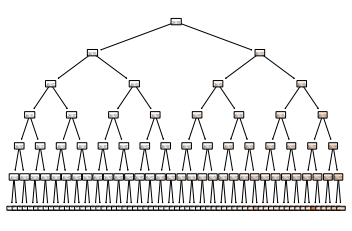

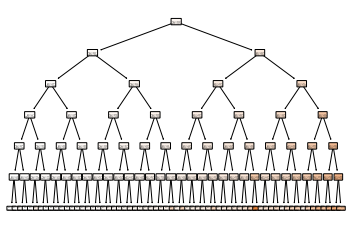

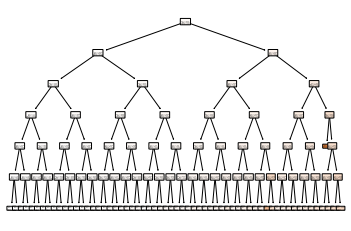

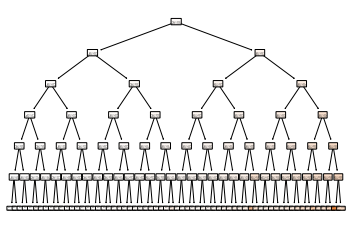

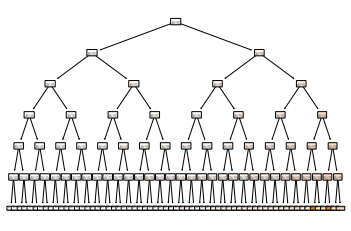

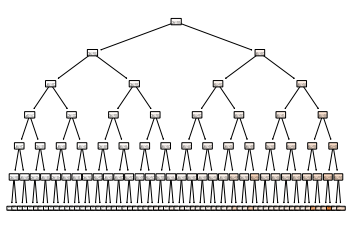

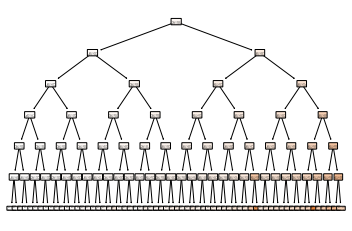

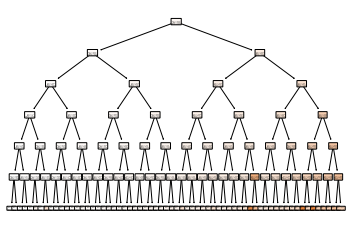

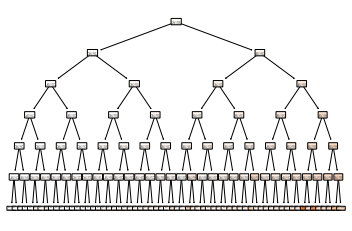

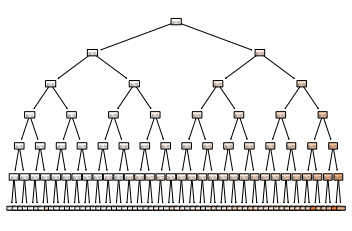

In [119]:
# Plot the Decision Trees from the Grid Search Random Forest

for x in range(len(grid2.best_estimator_.estimators_)):
    tree.plot_tree(
    grid2.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()

# 2- RF Classification: 

In [13]:
df2 = pd.read_csv('bank.csv')
df2.iloc[:, 1:]

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df2.shape

(11162, 17)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df2.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [6]:
df2['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [7]:
df2['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [11]:
df2['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

We can see from here that the deposit has 2 unique values represents out target classes. and 'no' is the majority class. 

Also, we have 'unknown' as our top for the 'poutcome'

In [8]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


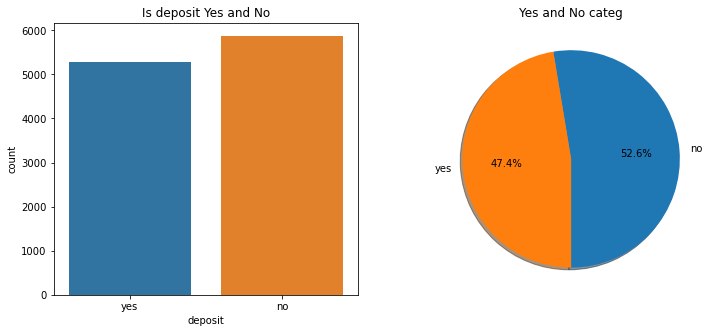

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=df2)
plt.title("Is deposit Yes and No")
plt.subplot(1,2,2)
labels =df2['deposit'].value_counts(sort = True).index
sizes = df2['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()

In [149]:
# looking into corr between col to decide on which cols to use in featureset

corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [16]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure


In [14]:
# Binarize target column
df2['deposit'] = df2['deposit'].map({'yes': 1, 'no': 0})


# Encode our target

y = df2['deposit']

# feature columns + dropping target 

df2.drop(columns= 'deposit' , inplace = True)
#featureset = ['age','duration','campaign','pdays','previous','balance','day']
X = df2[['age','duration','campaign','pdays','previous','balance','day']]


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [15]:
X_train

,age,duration,campaign,pdays,previous,balance,day
6490,45,118,4,-1,0,219,28
8360,82,195,3,-1,0,211,22
10790,25,250,1,-1,0,-221,23
2014,34,285,5,-1,0,29,15
7030,37,401,4,-1,0,578,8
...,...,...,...,...,...,...,...
6400,30,768,2,-1,0,0,14
9160,39,108,7,-1,0,0,21
9859,45,326,2,-1,0,67,5
1688,42,316,1,350,2,6060,30


In [19]:
# Function to perform training with RandomForestClassifier
def tarin_using_RFC(X_train, y_train):
  
    class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    class_forest.fit(X_train, y_train)
    print(class_forest.feature_importances_)

    return class_forest

In [32]:
# Function to perform training with RandomForestClassifier
def tarin_using_RFC_Grid(X_train, y_train):
  
    class_forest = RandomForestClassifier(n_estimators = 10, max_depth = 6 ,criterion = 'entropy', random_state = 0)
    class_forest.fit(X_train, y_train)
    print(class_forest.feature_importances_)

    return class_forest

In [20]:
# Function to perform prediction with RandomForestClassifier

def prediction(X_test, clf_object):
  
    # Predicton on test with RFR
    preds_forest = clf_object.predict(X_test)
    print("Predicted values:")
    print(preds_forest)
    return preds_forest

In [21]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
    confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [33]:
clf_RFC = tarin_using_RFC(X_train, y_train)

[0.14902502 0.40342227 0.04681379 0.0735011  0.03177873 0.17367625
 0.12178284]


In [34]:
# Prediction using RFC

print("Results Using RF Calssifier:")

y_pred_RFC = prediction(X_test, clf_RFC)
cal_accuracy(y_test, y_pred_RFC)

Results Using RF Calssifier:
Predicted values:
[0 1 0 ... 1 1 0]
Confusion Matrix:  [[1206  281]
 [ 345  959]]
Accuracy :  77.57076316732355
Report :                precision    recall  f1-score   support

           0       0.78      0.81      0.79      1487
           1       0.77      0.74      0.75      1304

    accuracy                           0.78      2791
   macro avg       0.78      0.77      0.77      2791
weighted avg       0.78      0.78      0.78      2791



In [29]:
# Classification

param_grid = {
    "n_estimators": [10,20,30], # how many trees in our forest
    "criterion": ["gini", "entropy"], # what criteria is used to split nodes
    "max_depth": [2,4,6] # how deep each decision tree can be
    
}

grid = GridSearchCV(
    clf_RFC,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             verbose=1)

In [30]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054661,0.003302,0.006596,0.002371,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.623881,0.669056,0.668459,0.651135,0.657706,0.654047,0.016522,16
1,0.083664,0.006285,0.008546,0.000754,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.614925,0.660096,0.678614,0.649940,0.679809,0.656677,0.023734,15
2,0.111293,0.001831,0.010190,0.000208,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.737313,0.784349,0.767025,0.777180,0.767025,0.766579,0.016031,14
3,0.050315,0.000936,0.005874,0.000406,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.774328,0.799283,0.793907,0.796296,0.779570,0.788677,0.009866,12
4,0.093740,0.001487,0.008439,0.000413,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.782687,0.798088,0.789725,0.793907,0.783154,0.789512,0.005999,8
5,0.155013,0.010184,0.013480,0.002562,gini,4,30,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.783881,0.801673,0.790323,0.790920,0.781362,0.789632,0.007051,7
6,0.070733,0.005848,0.009240,0.005231,gini,6,10,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.777910,0.802270,0.790323,0.793309,0.780167,0.788796,0.008913,11
7,0.136461,0.002989,0.010586,0.001889,gini,6,20,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.779701,0.804062,0.792712,0.796296,0.781959,0.790946,0.009066,5
8,0.175044,0.008785,0.010600,0.000965,gini,6,30,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.779104,0.802867,0.795102,0.799283,0.781362,0.791544,0.009583,4
9,0.040598,0.002970,0.005318,0.000336,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.619701,0.661290,0.666667,0.652927,0.657706,0.651658,0.016598,17


In [31]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
16,6,20,0.793335,1
17,6,30,0.792738,2
15,6,10,0.792260,3
8,6,30,0.791544,4
7,6,20,0.790946,5
14,4,30,0.790110,6
5,4,30,0.789632,7
4,4,20,0.789512,8
13,4,20,0.789273,9
12,4,10,0.788916,10


15 ---> Could be our best option because we got same result with less computations uisng Entropy

In [36]:
clf_RFC = tarin_using_RFC_Grid(X_train, y_train)

[0.10388913 0.57366844 0.02857525 0.13213981 0.08476002 0.05057011
 0.02639724]


In [37]:
# Prediction using RFC

print("Results Using RF Calssifier:")

y_pred_RFC = prediction(X_test, clf_RFC)
cal_accuracy(y_test, y_pred_RFC)

Results Using RF Calssifier:
Predicted values:
[0 1 0 ... 1 1 0]
Confusion Matrix:  [[1195  292]
 [ 323  981]]
Accuracy :  77.9648871372268
Report :                precision    recall  f1-score   support

           0       0.79      0.80      0.80      1487
           1       0.77      0.75      0.76      1304

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791



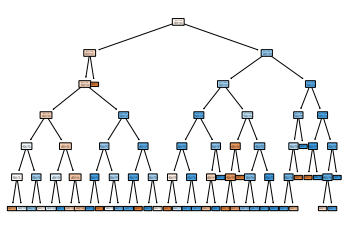

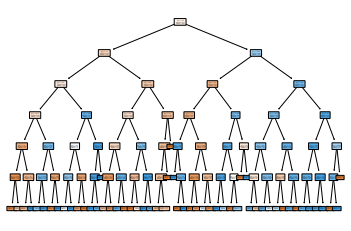

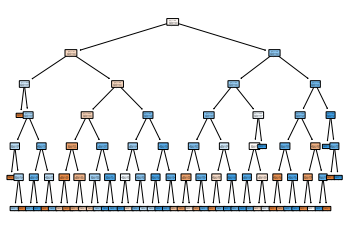

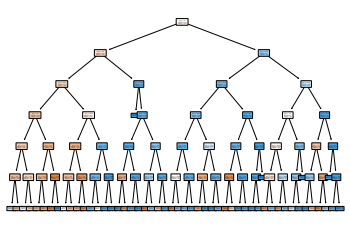

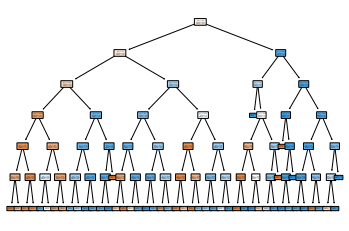

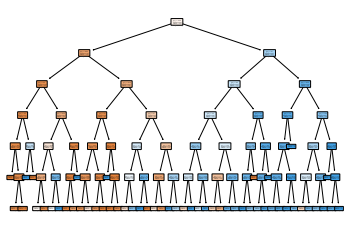

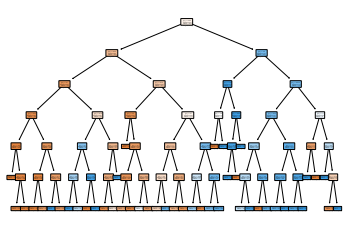

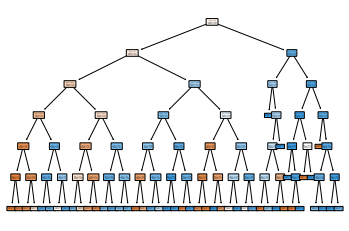

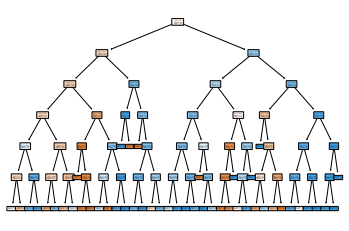

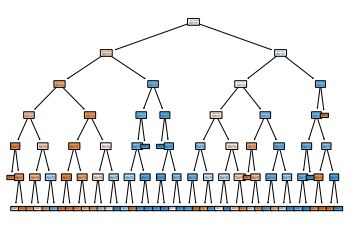

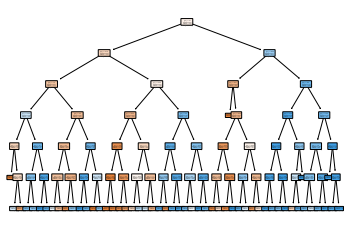

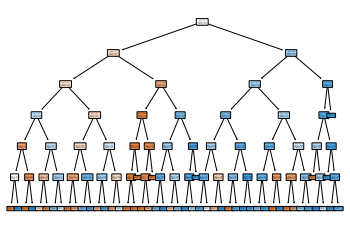

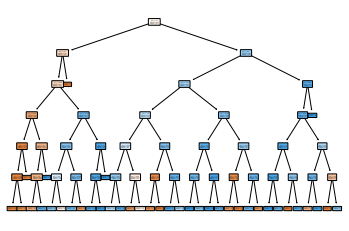

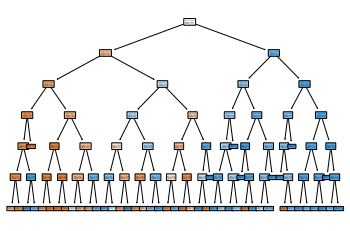

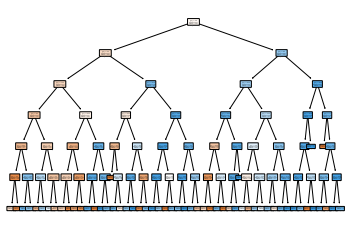

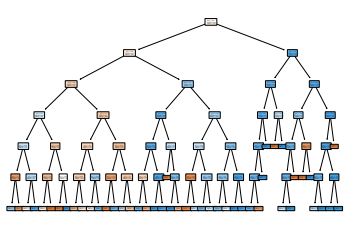

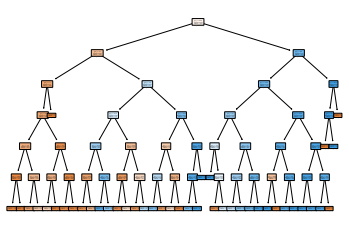

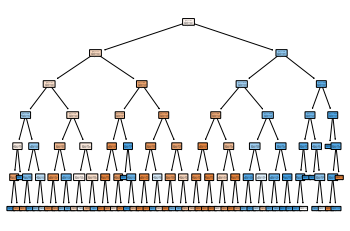

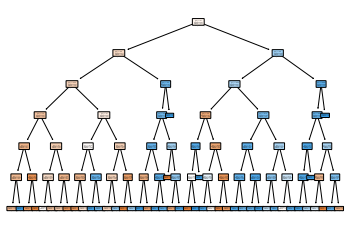

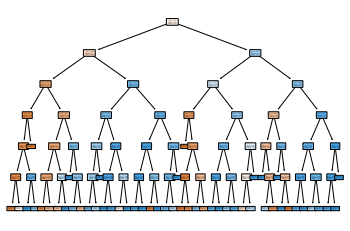

In [38]:
# Plot the Decision Trees from the Grid Search Random Forest
for x in range(len(grid.best_estimator_.estimators_)):
    tree.plot_tree(
    grid.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()